# Text Classification Using LSTM

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('SPAM_text_message_Data.csv')

In [4]:
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


<Axes: xlabel='Category', ylabel='count'>

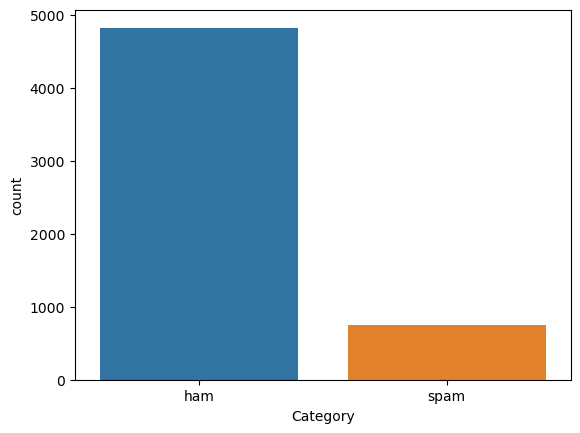

In [5]:
sns.countplot(x=df['Category'])

In [6]:
X= df['Message']
Y= df['Category']

In [7]:
# integer our label instead of replacing
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)
Y

array([0, 0, 1, ..., 0, 0, 0])

In [8]:
# split our data to tarin and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size= 0.2)

In [9]:
# preprocessing, delete and lower case or etc
from tensorflow.keras.preprocessing.text import Tokenizer
max_words = 500 # vocab_size maximum words in our copus
tkn = Tokenizer(num_words= max_words)
# fit on our real data
tkn.fit_on_texts(X_train)

In [10]:
# vectorize words tfidf or other way
seq = tkn.texts_to_sequences(X_train)
print(seq)

[[46, 1, 254, 1, 59, 14, 54, 6, 233, 10, 18, 58, 20, 26, 146], [91, 29, 194, 33, 67, 4, 411, 159, 412], [14, 124, 150, 20, 283, 12, 98, 78, 147], [60, 160, 11, 461, 1, 3, 36, 16, 3, 147], [79, 31, 54, 74, 2, 87], [37, 11, 7, 413, 177, 10, 347, 68, 4], [84, 73, 16, 101], [83, 6, 8, 40], [1, 11, 396, 25, 79, 32, 14, 142], [91, 1, 36, 70, 8, 42, 41, 219], [43, 59, 21, 289], [329, 434, 314, 348, 315, 43, 47, 137, 13, 115, 16, 47, 19, 2, 462, 20], [99, 64, 14, 60, 2, 88, 3, 207, 7, 283, 115, 3, 147, 1, 59, 2, 7, 4, 10, 220, 380], [132, 1, 5, 19, 451, 164, 53, 251, 22, 39, 74, 12, 361, 189, 13, 451, 123, 47, 39, 90, 2, 165, 7, 89], [102, 13, 255, 53, 3, 435, 2, 28, 19, 62, 42, 41], [284, 1, 297, 88, 3], [195, 11], [3, 151, 32, 125, 34, 3, 69, 436, 120, 1, 111, 56, 80], [38, 38, 1, 36, 330, 51], [23, 87], [117, 452, 3, 208], [12, 96, 362, 17, 3, 103, 39, 25, 92, 258, 16, 47, 26, 71, 85], [199, 116, 4, 209, 62], [64, 27], [221, 5], [54, 96, 259, 67], [453, 32, 5, 234, 19, 13, 97, 112, 7, 96, 4

In [11]:
#equalizaion of lenth of sentences
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_len = 100
padded_docs = pad_sequences(seq,padding= 'pre' , maxlen =max_len)

In [12]:
print(padded_docs)

[[  0   0   0 ...  20  26 146]
 [  0   0   0 ... 411 159 412]
 [  0   0   0 ...  98  78 147]
 ...
 [  0   0   0 ...   2   6  51]
 [  0   0   0 ...  40 352 363]
 [  0   0   0 ...   3 466   2]]


In [13]:
# end of preprocessing

In [14]:
# create model
from tensorflow.keras.models import Sequential # layer model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding

embedding_vector_feature = 30 # every vector has 30 feature
model = Sequential()
model.add(Embedding(max_words , embedding_vector_feature, input_length= max_len))
model.add(LSTM(256))
model.add(Dense(1 , activation= 'sigmoid')) # for classification to output classified hame of spam
model.compile(loss= 'binary_crossentropy' , optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 30)           15000     
                                                                 
 lstm (LSTM)                 (None, 256)               293888    
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 309145 (1.18 MB)
Trainable params: 309145 (1.18 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
len(padded_docs)

4457

In [16]:
len(Y_train)

4457

In [17]:
X_train

5461    Ok i thk i got it. Then u wan me 2 come now or...
5249        K I'm leaving soon, be there a little after 9
3654    It has issues right now. Ill fix for her by to...
1708    Was doing my test earlier. I appreciate you. W...
2898    Ü collecting ur laptop then going to configure...
                              ...                        
4043                              What time do u get out?
1241    Oh yes I can speak txt 2 u no! Hmm. Did u get ...
3017    &lt;#&gt;  is fast approaching. So, Wish u a v...
69                     I plane to give on this month end.
2138                         Then why you came to hostel.
Name: Message, Length: 4457, dtype: object

In [18]:
Y_train

array([0, 0, 0, ..., 0, 0, 0])

In [19]:
# fit our data on the model
model.fit(padded_docs, Y_train, batch_size=128, epochs=10, validation_split=0.2)

Epoch 1/10
28/28 [==============================] - 8s 232ms/step - loss: 0.4653 - accuracy: 0.8525 - val_loss: 0.3644 - val_accuracy: 0.8688
Epoch 2/10
28/28 [==============================] - 7s 237ms/step - loss: 0.2619 - accuracy: 0.9063 - val_loss: 0.1134 - val_accuracy: 0.9686
Epoch 3/10
28/28 [==============================] - 7s 237ms/step - loss: 0.0981 - accuracy: 0.9717 - val_loss: 0.0816 - val_accuracy: 0.9776
Epoch 4/10
28/28 [==============================] - 7s 236ms/step - loss: 0.0626 - accuracy: 0.9801 - val_loss: 0.0732 - val_accuracy: 0.9798
Epoch 5/10
28/28 [==============================] - 7s 234ms/step - loss: 0.0576 - accuracy: 0.9835 - val_loss: 0.0593 - val_accuracy: 0.9832
Epoch 6/10
28/28 [==============================] - 7s 235ms/step - loss: 0.0438 - accuracy: 0.9885 - val_loss: 0.0574 - val_accuracy: 0.9854
Epoch 7/10
28/28 [==============================] - 7s 234ms/step - loss: 0.0394 - accuracy: 0.9891 - val_loss: 0.0664 - val_accuracy: 0.9854
Epoch 

In [20]:
# evaluate how model fit on the X_test
text_seq= tkn.texts_to_sequences(X_test) # vectorization of X_test
test_padded = pad_sequences(text_seq, maxlen= max_len)

In [21]:
accr = model.evaluate(test_padded, Y_test)
print(accr)

35/35 [==============================] - 2s 43ms/step - loss: 0.0712 - accuracy: 0.9812
[0.07122153043746948, 0.9811659455299377]


### 1: save model

In [22]:
model.save('Sepide_Model')

INFO:tensorflow:Assets written to: Sepide_Model\assets


INFO:tensorflow:Assets written to: Sepide_Model\assets


In [23]:
from tensorflow.keras.models import load_model
new_model = load_model('Sepide_Model')

In [24]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 30)           15000     
                                                                 
 lstm (LSTM)                 (None, 256)               293888    
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 309145 (1.18 MB)
Trainable params: 309145 (1.18 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
new_model.get_weights()

[array([[ 0.00166215,  0.00576804,  0.02362509, ...,  0.01653916,
         -0.00394378,  0.00022278],
        [ 0.0350718 , -0.05756317,  0.01059158, ...,  0.07041446,
          0.10414133,  0.08582371],
        [-0.00638549, -0.00298154, -0.00139119, ...,  0.02525078,
         -0.03468129, -0.05120867],
        ...,
        [ 0.08662044, -0.03115304,  0.03656643, ...,  0.06071164,
          0.03578808,  0.08421206],
        [-0.08994425,  0.02802845, -0.01087677, ..., -0.03115414,
         -0.0828443 , -0.05774138],
        [ 0.01379337, -0.0479677 ,  0.05257615, ...,  0.07244608,
         -0.0132877 , -0.00614694]], dtype=float32),
 array([[-0.01835019,  0.12718605,  0.01142122, ...,  0.08917464,
         -0.02547096,  0.11287908],
        [-0.04183782, -0.06635438,  0.04193971, ..., -0.0935513 ,
         -0.00398847, -0.12024967],
        [ 0.08559032,  0.09090254, -0.04169784, ...,  0.08287884,
         -0.10187303, -0.03009956],
        ...,
        [-0.05884194, -0.00781036, -0.0

In [26]:
new_model.optimizer

### 2 save model to Json

In [27]:
json_string = model.to_json()

In [28]:
json_string

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"module": "keras.layers", "class_name": "InputLayer", "config": {"batch_input_shape": [null, 100], "dtype": "float32", "sparse": false, "ragged": false, "name": "embedding_input"}, "registered_name": null}, {"module": "keras.layers", "class_name": "Embedding", "config": {"name": "embedding", "trainable": true, "dtype": "float32", "batch_input_shape": [null, 100], "input_dim": 500, "output_dim": 30, "embeddings_initializer": {"module": "keras.initializers", "class_name": "RandomUniform", "config": {"minval": -0.05, "maxval": 0.05, "seed": null}, "registered_name": null}, "embeddings_regularizer": null, "activity_regularizer": null, "embeddings_constraint": null, "mask_zero": false, "input_length": 100}, "registered_name": null, "build_config": {"input_shape": [null, 100]}}, {"module": "keras.layers", "class_name": "LSTM", "config": {"name": "lstm", "trainable": true, "dtype": "float32", "return_sequences": false,

In [29]:
from tensorflow.keras.models import model_from_json
model_arct = model_from_json(json_string)

In [30]:
model_arct.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 30)           15000     
                                                                 
 lstm (LSTM)                 (None, 256)               293888    
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 309145 (1.18 MB)
Trainable params: 309145 (1.18 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
model_arct.get_weights()

[array([[ 0.00900338,  0.04916557, -0.04818237, ..., -0.04034655,
         -0.01114315, -0.01120211],
        [ 0.02400832,  0.04740128,  0.03758122, ...,  0.02882567,
         -0.04416976,  0.01289797],
        [ 0.0339228 , -0.03807089, -0.02384043, ...,  0.01562886,
          0.02968464,  0.03250815],
        ...,
        [ 0.00722939,  0.00906054,  0.03601134, ..., -0.03514921,
         -0.03918846, -0.03340393],
        [-0.00376501,  0.03788872, -0.00351789, ...,  0.00481261,
          0.04212848,  0.02051583],
        [-0.01254987, -0.0358191 , -0.01635702, ...,  0.03650359,
          0.00913533,  0.04810439]], dtype=float32),
 array([[ 0.01711277, -0.06652977,  0.07279979, ..., -0.06748269,
         -0.03077625,  0.022511  ],
        [ 0.05220085,  0.0603056 ,  0.04933529, ...,  0.00568628,
          0.01338322, -0.0650957 ],
        [ 0.01134597, -0.04985815, -0.05994044, ..., -0.05634044,
         -0.04047591,  0.06267247],
        ...,
        [-0.03764319,  0.06275219, -0.0

### 3 save wights

In [32]:
model.save_weights('my_model_weights')

In [33]:
model2 = Sequential()
model2.add(Embedding(max_words , embedding_vector_feature, input_length= max_len))
model2.add(LSTM(256))
model2.add(Dense(1 , activation= 'sigmoid'))

In [34]:
# give weight to the new models 
model2.load_weights('my_model_weights')